In [1]:
library(tidyverse)
library(dbplyr)
library(RPostgreSQL)
library(ggalluvial)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘dbplyr’

The following objects are masked from ‘package:dplyr’:

    ident, sql

Loading required package: DBI


In [2]:
con = dbConnect(PostgreSQL(),dbname = 'yourdb', 
                 host = 'yourhost',
                 port = 0000)

In [3]:
d=read_csv("tpj12928-sup-0004-tables1.csv",col_types="ccccdddddddddddfdddfdddf")
head(d)

GeneID,Ath_homolog,short_name,desc,Protonemal_Tip_Cell_1.RPM,Protonemal_Tip_Cell_2.RPM,Protonemal_Tip_Cell_3.RPM,Bud_Cell_1.RPM,Bud_Cell_2.RPM,Bud_Cell_3.RPM,⋯,Tip Cell Versus Whole Plant Q-value,Tip Cell Versus Whole Plant Significant,Bud Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant P-value,Bud Cell Versus Whole Plant Q-value,Bud Cell Versus Whole Plant Significant,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Bud Cell P-value,Tip Cell Versus Bud Cell Q-value,Tip Cell Versus Bud Cell Significant
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
Pp1s235_56V6,NA,NA,NA,0,0,0,0.0000,0.1432,0.0000,⋯,0.025362615,yes,-10.529,0.01626451,0.02312801,yes,NA,NA,NA,NA
Pp1s34_349V6,NA,NA,NA,0,0,0,0.1201,0.1432,0.0000,⋯,0.022047644,yes,-9.961,0.01393475,0.02106792,yes,NA,NA,NA,NA
Pp1s226_53V6,NA,NA,NA,0,0,0,0.0000,0.0000,0.3636,⋯,0.017755577,yes,-3.190,0.07800496,0.06492998,no,NA,NA,NA,NA
Pp1s154_123V6,NA,NA,NA,0,0,0,0.0000,0.0000,0.0000,⋯,0.028931440,yes,-19.603,0.01233799,0.01969629,yes,NA,NA,NA,NA
Pp1s75_138V6,AT5G56320,"ATEXP14,ATEXPA14,ATHEXP ALPHA 1.5,EXP14,EXPA14",expansin A14,0,0,0,0.2402,0.0000,0.0000,⋯,0.030823104,yes,-2.661,0.13248929,0.09454546,no,NA,NA,NA,NA
Pp1s72_134V6,NA,NA,NA,0,0,0,0.1201,0.2863,0.0000,⋯,0.007164485,yes,-2.162,0.06291388,0.05607968,no,NA,NA,NA,NA


In [4]:
l=read_tsv("../../genome_annotation/missing_V1.6/lookup_table.txt",col_types=cols()) %>% 
separate_rows(v1.6,sep=";") %>% 
separate_rows(v1.6_multi,sep=";") %>%
mutate(v1.6=str_replace(v1.6,"V6\\.\\d+$","V6")) %>%
mutate(v1.6_multi=str_replace(v1.6_multi,"V6\\.\\d+$","V6")) %>%
mutate(geneid=str_replace(v3.3,"V3\\.\\d+$",".mRNA"))
head(l)

v3.3,v3.1,v1.6,v1.6_multi,v1.2,Phypa,Phypa_multi,Phpat,geneid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c1_10000V3.1,Pp3c1_10000V1.1,Pp1s139_2V6,NA,Pp1s139_2V2.1,Phypa_189945,NA,Phpat.001G040700,Pp3c1_10000.mRNA
Pp3c1_1000V3.1,Pp3c1_1000V1.1,Pp1s200_100V6,NA,Pp1s200_101V2.1,Phypa_143240,NA,Phpat.001G004900,Pp3c1_1000.mRNA
Pp3c1_1000V3.1,Pp3c1_1000V1.1,Pp1s200_101V6,NA,Pp1s200_101V2.1,Phypa_143240,NA,Phpat.001G004900,Pp3c1_1000.mRNA
Pp3c1_10010V3.1,Pp3c1_10010V1.1,Pp1s139_3V6,NA,Pp1s139_3V2.1,Phypa_137714,NA,Phpat.001G040800,Pp3c1_10010.mRNA
Pp3c1_10040V3.1,Pp3c1_10040V1.1,Pp1s139_5V6,NA,Pp1s139_5V2.1,Phypa_137685,NA,Phpat.001G040900,Pp3c1_10040.mRNA
Pp3c1_10050V3.1,Pp3c1_10050V1.1,Pp1s139_6V6,NA,NA,NA,NA,Phpat.001G041000,Pp3c1_10050.mRNA


In [5]:
L=bind_rows (
    l %>% select(geneid,v1.6) %>% rename(GeneID=v1.6) %>% distinct(),
    l %>% select(geneid,v1.6_multi)  %>% rename(GeneID=v1.6_multi) %>% distinct(),
) %>% distinct()
head(L)

geneid,GeneID
<chr>,<chr>
Pp3c1_10000.mRNA,Pp1s139_2V6
Pp3c1_1000.mRNA,Pp1s200_100V6
Pp3c1_1000.mRNA,Pp1s200_101V6
Pp3c1_10010.mRNA,Pp1s139_3V6
Pp3c1_10040.mRNA,Pp1s139_5V6
Pp3c1_10050.mRNA,Pp1s139_6V6


In [6]:
D=inner_join(L,d,by="GeneID")
nrow(d)
nrow(D)
head(D)

[1] 32863

[1] 33881

geneid,GeneID,Ath_homolog,short_name,desc,Protonemal_Tip_Cell_1.RPM,Protonemal_Tip_Cell_2.RPM,Protonemal_Tip_Cell_3.RPM,Bud_Cell_1.RPM,Bud_Cell_2.RPM,⋯,Tip Cell Versus Whole Plant Q-value,Tip Cell Versus Whole Plant Significant,Bud Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant P-value,Bud Cell Versus Whole Plant Q-value,Bud Cell Versus Whole Plant Significant,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Bud Cell P-value,Tip Cell Versus Bud Cell Q-value,Tip Cell Versus Bud Cell Significant
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
Pp3c1_10000.mRNA,Pp1s139_2V6,AT1G76490,"HMG1,HMGR1",hydroxy methylglutaryl CoA reductase 1,36.4253,30.8138,21.3555,33.8676,45.6700,⋯,0.32622379,no,-0.159,0.70744862,0.30994237,no,0.007,0.98366587,0.4268647,no
Pp3c1_1000.mRNA,Pp1s200_100V6,NA,NA,NA,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Pp3c1_1000.mRNA,Pp1s200_101V6,AT1G21600,PTAC6,plastid transcriptionally active 6,69.4424,60.9273,49.6317,46.5979,33.2145,⋯,0.01561351,yes,0.474,0.49868059,0.24291436,no,1.431,0.01662763,0.0271888,yes
Pp3c1_10010.mRNA,Pp1s139_3V6,AT5G64050,"ATERS,ERS,OVA3",glutamate tRNA synthetase,51.9753,74.8168,69.4053,36.0293,51.6830,⋯,0.06333449,no,-0.164,0.69663060,0.30673073,no,0.914,0.03830250,0.0480583,yes
Pp3c1_10040.mRNA,Pp1s139_5V6,AT4G01560,MEE49,Ribosomal RNA processing Brix domain protein,51.7622,50.6560,37.5698,71.0979,136.1510,⋯,0.11119204,no,1.163,0.01784463,0.02446753,yes,-0.625,0.11036599,0.0997560,no
Pp3c1_10050.mRNA,Pp1s139_6V6,AT2G41530,"ATSFGH,SFGH",S-formylglutathione hydrolase,1.4911,0.2334,0.0000,0.0000,0.2863,⋯,0.08537549,no,0.593,0.68989026,0.30482875,no,1.871,0.27085650,0.1852138,no


In [7]:
na=c("Tip Cell Versus Whole Plant","Bud Cell Versus Whole Plant","Tip Cell Versus Bud Cell")
get_status=function(n) {
    ifelse(D[,paste(n,"Q-value")]<0.01,ifelse(D[,paste(n,"log2FC")]>0,"up","down"),"unchanged")
}

DD=do.call(cbind.data.frame,lapply(na,get_status)) 
names(DD)=na
DD=bind_cols(D %>% select(c(1:5,14,18,22)) , DD) %>% filter(! is.na(`Tip Cell Versus Whole Plant`) & 
                                              ! is.na(`Bud Cell Versus Whole Plant`) &
                                              ! is.na(`Tip Cell Versus Bud Cell`) )  %>% distinct()
head(DD)

geneid,GeneID,Ath_homolog,short_name,desc,Tip Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant log2FC,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Whole Plant,Bud Cell Versus Whole Plant,Tip Cell Versus Bud Cell
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Pp3c1_10000.mRNA,Pp1s139_2V6,AT1G76490,"HMG1,HMGR1",hydroxy methylglutaryl CoA reductase 1,-0.147,-0.159,0.007,unchanged,unchanged,unchanged
Pp3c1_1000.mRNA,Pp1s200_101V6,AT1G21600,PTAC6,plastid transcriptionally active 6,1.912,0.474,1.431,unchanged,unchanged,unchanged
Pp3c1_10010.mRNA,Pp1s139_3V6,AT5G64050,"ATERS,ERS,OVA3",glutamate tRNA synthetase,0.754,-0.164,0.914,unchanged,unchanged,unchanged
Pp3c1_10040.mRNA,Pp1s139_5V6,AT4G01560,MEE49,Ribosomal RNA processing Brix domain protein,0.543,1.163,-0.625,unchanged,unchanged,unchanged
Pp3c1_10050.mRNA,Pp1s139_6V6,AT2G41530,"ATSFGH,SFGH",S-formylglutathione hydrolase,2.472,0.593,1.871,unchanged,unchanged,unchanged
Pp3c1_10060.mRNA,Pp1s139_7V6,AT2G24240,NA,BTB/POZ domain with WD40/YVTN repeat-like protein,0.067,-1.021,1.076,unchanged,unchanged,unchanged


In [8]:
m=tbl(con,in_schema("physcogrn","dek1_major_sets")) %>% collect()
head(m)

geneid,subnetwork,mutant_pattern,development,dek1_target,overbudding,overbudding_filaments,auxin_responsive,ka_responsive
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c1_10200.mRNA,IX,repressor target,unchanged,indirect,unchanged,unchanged,no,no
Pp3c1_10220.mRNA,XI,repressor target,WT 9-14 days,indirect,unchanged,unchanged,no,no
Pp3c1_10400.mRNA,XI,activator target,unchanged,indirect,up,unchanged,no,no
Pp3c1_10760.mRNA,IX,activator target,WT 9-14 days,indirect,unchanged,unchanged,no,no
Pp3c1_10830.mRNA,IX,activator target,unchanged,indirect,unchanged,unchanged,no,no
Pp3c1_11030.mRNA,V,repressor target,WT 3-5 days,no,down,unchanged,no,yes


In [9]:
gn=tbl(con,in_schema("physcogrn","gene_name")) %>% collect()
head(gn)

geneid,community,centrality_rank,reg_class,name,description
<chr>,<chr>,<int>,<chr>,<chr>,<chr>
Pp3c15_11610.mRNA,I,6,TR,GNAT,PTHR24055:SF10 - MITOGEN-ACTIVATED PROTEIN KINASE 3 (1 of 1)
Pp3c19_8700.mRNA,I,16,TF,tify,PTHR33077:SF8 - PROTEIN TIFY 8 (1 of 2)
Pp3c4_2680.mRNA,I,34,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150)
Pp3c16_13260.mRNA,I,36,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150)
Pp3c9_11330.mRNA,I,66,TF,tify,PTHR33077:SF13 - PROTEIN TIFY 10A-RELATED (1 of 10)
Pp3c14_14900.mRNA,I,68,TF,"ppmc6,PPMC6","K09264 - MADS-box transcription factor, plant (K09264) (1 of 2)"


In [10]:
m=inner_join(gn,m,by="geneid")

In [11]:
M=inner_join(DD,m,by="geneid")
MA=right_join(DD,m,by="geneid")
nrow(m)
nrow(M)
nrow(MA)
head(M)

[1] 5818

[1] 5872

[1] 6535

geneid,GeneID,Ath_homolog,short_name,desc,Tip Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant log2FC,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Whole Plant,Bud Cell Versus Whole Plant,⋯,name,description,subnetwork,mutant_pattern,development,dek1_target,overbudding,overbudding_filaments,auxin_responsive,ka_responsive
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c1_10200.mRNA,Pp1s139_27V6,AT1G36980,NA,NA,-1.289,-2.146,0.848,unchanged,unchanged,⋯,NA,PTHR13180 - SMALL MEMBRANE PROTEIN-RELATED (1 of 2),IX,repressor target,unchanged,indirect,unchanged,unchanged,no,no
Pp3c1_10220.mRNA,Pp1s139_29V6,AT5G02970,NA,alpha/beta-Hydrolases superfamily protein,-0.874,-0.495,-0.386,unchanged,unchanged,⋯,NA,"3.7.1.8 - 2,6-dioxo-6-phenylhexa-3-enoate hydrolase / HOHPDA hydrolase (1 of 4)",XI,repressor target,WT 9-14 days,indirect,unchanged,unchanged,no,no
Pp3c1_10400.mRNA,Pp1s139_36V6,AT5G36210,NA,alpha/beta-Hydrolases superfamily protein,1.198,-0.626,1.816,unchanged,unchanged,⋯,NA,"PTHR11731//PTHR11731:SF126 - PROTEASE FAMILY S9B,C DIPEPTIDYL-PEPTIDASE IV-RELATED // SUBFAMILY NOT NAMED (1 of 1)",XI,activator target,unchanged,indirect,up,unchanged,no,no
Pp3c1_10760.mRNA,Pp1s139_77V6,AT2G32320,NA,tRNAHis guanylyltransferase,-0.998,0.108,-1.111,unchanged,unchanged,⋯,NA,2.7.7.79 - tRNA(His) guanylyltransferase / Histidine tRNA guanylyltransferase (1 of 1),IX,activator target,WT 9-14 days,indirect,unchanged,unchanged,no,no
Pp3c1_10830.mRNA,Pp1s35_326V6,AT2G41380,NA,S-adenosyl-L-methionine-dependent methyltransferases superfamily protein,2.038,0.219,1.814,up,unchanged,⋯,NA,PTHR10108//PTHR10108:SF707 - METHYLTRANSFERASE // SUBFAMILY NOT NAMED (1 of 1),IX,activator target,unchanged,indirect,unchanged,unchanged,no,no
Pp3c1_11030.mRNA,Pp1s139_88V6,AT3G22600,NA,Bifunctional inhibitor/lipid-transfer protein/seed storage 2S albumin superfamily protein,0.984,-1.858,2.845,unchanged,unchanged,⋯,NA,2.7.11.18 - [Myosin light-chain] kinase / Smooth-muscle-myosin-light-chain kinase (1 of 3),V,repressor target,WT 3-5 days,no,down,unchanged,no,yes


In [12]:
MM=M %>% filter(overbudding != "unchanged")

In [13]:
table(MM$`Bud Cell Versus Whole Plant`)


     down unchanged        up 
      139      1467       234 

In [14]:
table(MM$`Tip Cell Versus Whole Plant`)


     down unchanged        up 
      240      1452       148 

In [15]:
table(MM$`Tip Cell Versus Bud Cell`)


     down unchanged        up 
      287      1408       145 

In [16]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=1000)

In [17]:
M %>% filter(str_detect(short_name,"DRN"))

geneid,GeneID,Ath_homolog,short_name,desc,Tip Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant log2FC,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Whole Plant,Bud Cell Versus Whole Plant,Tip Cell Versus Bud Cell,community,centrality_rank,reg_class,name,description,subnetwork,mutant_pattern,development,dek1_target,overbudding,overbudding_filaments,auxin_responsive,ka_responsive
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c10_16720.mRNA,Pp1s145_10V6,AT1G12980,"DRN,ESR1",Integrase-type DNA-binding superfamily protein,0.561,4.062,-3.532,unchanged,up,down,II,125,TF,AP2/EREBP,PTHR31677:SF3 - ETHYLENE-RESPONSIVE TRANSCRIPTION FACTOR 14-RELATED (1 of 3),II,activator target,WT 9-14 days,both,up,unchanged,no,no
Pp3c18_10680.mRNA,Pp1s19_272V6,AT1G24590,"DRN-LIKE,DRNL,ESR2,SOB2",DORNROSCHEN-like,-3.103,3.591,-6.830,unchanged,up,down,II,81,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150),II,activator target,WT 9-14 days,both,up,up,yes,no
Pp3c19_14950.mRNA,Pp1s20_184V6,AT1G24590,"DRN-LIKE,DRNL,ESR2,SOB2",DORNROSCHEN-like,1.540,2.578,-1.052,unchanged,up,unchanged,II,131,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150),II,activator target,unchanged,both,up,up,yes,no
Pp3c22_10880.mRNA,Pp1s121_50V6,AT1G24590,"DRN-LIKE,DRNL,ESR2,SOB2",DORNROSCHEN-like,-4.219,3.839,-8.160,unchanged,up,down,II,148,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150),II,activator target,WT 9-14 days,both,up,up,yes,no
Pp3c25_4250.mRNA,Pp1s340_16V6,AT1G12980,"DRN,ESR1",Integrase-type DNA-binding superfamily protein,0.752,-2.148,2.895,unchanged,unchanged,unchanged,II,251,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150),II,TF with deregulated target,WT 3-14 days,direct,unchanged,unchanged,no,no
Pp3c3_19630.mRNA,Pp1s204_42V6,AT1G12980,"DRN,ESR1",Integrase-type DNA-binding superfamily protein,-0.214,3.488,-3.713,unchanged,up,down,II,68,TF,AP2/EREBP,PF00847 - AP2 domain (AP2) (1 of 150),II,activator target,WT 9-14 days,both,up,up,no,no
Pp3c6_20480.mRNA,Pp1s14_303V6,AT1G12980,"DRN,ESR1",Integrase-type DNA-binding superfamily protein,-14.498,1.824,-15.871,unchanged,unchanged,unchanged,IV,182,TF,AP2/EREBP,PTHR31677:SF3 - ETHYLENE-RESPONSIVE TRANSCRIPTION FACTOR 14-RELATED (1 of 3),IV,TF with deregulated target,WT 9-14 days,direct,unchanged,unchanged,no,no


In [18]:
M %>% filter(str_detect(desc,"STRUB"))

geneid,GeneID,Ath_homolog,short_name,desc,Tip Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant log2FC,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Whole Plant,Bud Cell Versus Whole Plant,Tip Cell Versus Bud Cell,community,centrality_rank,reg_class,name,description,subnetwork,mutant_pattern,development,dek1_target,overbudding,overbudding_filaments,auxin_responsive,ka_responsive
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c4_12460.mRNA,Pp1s284_52V6,AT4G22130,SRF8,STRUBBELIG-receptor family 8,-27.844,-1.175,-23.051,unchanged,unchanged,unchanged,X,484,NA,NA,PTHR27001:SF21 - PROTEIN STRUBBELIG-RECEPTOR FAMILY 6-RELATED (1 of 6),X,activator target,WT 9-14 days,indirect,up,unchanged,no,no
Pp3c5_8240.mRNA,Pp1s64_28V6,AT4G22130,SRF8,STRUBBELIG-receptor family 8,2.869,-1.933,4.805,up,unchanged,up,V,1101,NA,NA,PTHR27001:SF21 - PROTEIN STRUBBELIG-RECEPTOR FAMILY 6-RELATED (1 of 6),V,repressor target,WT 3-5 days,indirect,unchanged,unchanged,no,no


In [19]:
D %>% filter(str_detect(desc,"STRUB") & geneid=="Pp3c4_12460.mRNA")

geneid,GeneID,Ath_homolog,short_name,desc,Protonemal_Tip_Cell_1.RPM,Protonemal_Tip_Cell_2.RPM,Protonemal_Tip_Cell_3.RPM,Bud_Cell_1.RPM,Bud_Cell_2.RPM,Bud_Cell_3.RPM,Whole_Plant_1.RPM,Whole_Plant_2.RPM,Tip Cell Versus Whole Plant log2FC,Tip Cell Versus Whole Plant P-value,Tip Cell Versus Whole Plant Q-value,Tip Cell Versus Whole Plant Significant,Bud Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant P-value,Bud Cell Versus Whole Plant Q-value,Bud Cell Versus Whole Plant Significant,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Bud Cell P-value,Tip Cell Versus Bud Cell Q-value,Tip Cell Versus Bud Cell Significant
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
Pp3c4_12460.mRNA,Pp1s284_52V6,AT4G22130,SRF8,STRUBBELIG-receptor family 8,0,0,0,2.402,0.4295,0.1818,1.862,6.4735,-27.844,0.01177619,0.01833693,yes,-1.175,0.4147348,0.2137837,no,-23.051,0.01166057,0.02143943,yes


In [20]:
M %>% filter(str_detect(desc,"squamosa"))

geneid,GeneID,Ath_homolog,short_name,desc,Tip Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant log2FC,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Whole Plant,Bud Cell Versus Whole Plant,Tip Cell Versus Bud Cell,community,centrality_rank,reg_class,name,description,subnetwork,mutant_pattern,development,dek1_target,overbudding,overbudding_filaments,auxin_responsive,ka_responsive
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c12_24350.mRNA,Pp1s118_9V6,AT1G02065,SPL8,squamosa promoter binding protein-like 8,-18.852,-0.277,-28.681,down,unchanged,down,II,174,TF,"SBP1,sbp1",PTHR31251:SF4 - SQUAMOSA PROMOTER-BINDING-LIKE PROTEIN 8 (1 of 6),II,TF with deregulated target,unchanged,direct,unchanged,unchanged,no,no
Pp3c14_18960.mRNA,Pp1s34_37V6,AT3G60030,SPL12,squamosa promoter-binding protein-like 12,-1.969,-0.231,-1.745,down,unchanged,unchanged,VII,48,TF,SBP10,squamosa promoter-binding-like protein 1,VII,TF with deregulated target,WT 9-14 days,no,unchanged,unchanged,no,no
Pp3c16_7490.mRNA,Pp1s194_57V6,AT5G43270,SPL2,squamosa promoter binding protein-like 2,0.054,0.946,-0.907,unchanged,unchanged,unchanged,VI,86,TF,SBP13,squamosa promoter-binding-like protein 12,VI,TF with deregulated target,unchanged,direct,up,unchanged,no,no
Pp3c16_7540.mRNA,Pp1s194_61V6,AT1G02065,SPL8,squamosa promoter binding protein-like 8,-27.758,1.355,-26.713,down,unchanged,unchanged,X,13,TF,SBP8,PTHR31251:SF4 - SQUAMOSA PROMOTER-BINDING-LIKE PROTEIN 8 (1 of 6),X,activator target,WT 9-14 days,both,unchanged,unchanged,no,no
Pp3c17_12760.mRNA,Pp1s313_76V6,AT1G20980,"ATSPL14,FBR6,SPL14,SPL1R2",squamosa promoter binding protein-like 14,1.159,0.531,0.619,unchanged,unchanged,unchanged,XI,88,TF,SBP2,squamosa promoter-binding-like protein 14,XI,TF with deregulated target,WT 3-14 days,no,unchanged,unchanged,no,no
Pp3c17_12760.mRNA,Pp1s313_76V6,AT3G60030,SPL12,squamosa promoter-binding protein-like 12,1.159,0.531,0.619,unchanged,unchanged,unchanged,XI,88,TF,SBP2,squamosa promoter-binding-like protein 14,XI,TF with deregulated target,WT 3-14 days,no,unchanged,unchanged,no,no
Pp3c25_8610.mRNA,Pp1s50_127V6,AT1G02065,SPL8,squamosa promoter binding protein-like 8,-28.446,0.087,-16.555,down,unchanged,down,X,14,TF,SBP12,uncharacterized LOC112277409,X,TF with deregulated target,WT 9-14 days,direct,unchanged,unchanged,no,no
Pp3c25_8630.mRNA,Pp1s50_125V6,AT5G43270,SPL2,squamosa promoter binding protein-like 2,-1.592,0.798,-2.401,unchanged,unchanged,unchanged,X,65,TF,SBP6,uncharacterized LOC112277518,X,TF with deregulated target,WT 3-14 days,no,unchanged,down,yes,no
Pp3c3_23940.mRNA,Pp1s47_14V6,AT2G47070,SPL1,squamosa promoter binding protein-like 1,-0.730,-1.362,0.627,unchanged,unchanged,unchanged,IX,131,TF,SBP11,PTHR31251:SF1 - SQUAMOSA PROMOTER-BINDING-LIKE PROTEIN 10-RELATED (1 of 4),IX,TF with deregulated target,WT 9-14 days,no,unchanged,unchanged,no,no


In [21]:
MM=M %>%  filter(`Tip Cell Versus Bud Cell`=="down") # genes upregulated in buds vs protonemal tip cells

In [22]:
nrow(MM)
table(MM$overbudding,MM$dek1_target)

[1] 556

           
            both direct indirect  no
  down         0      3        8   8
  unchanged    3     37      171  58
  up          11      3      247   7

In [23]:
X=table(bud.specific=M$`Tip Cell Versus Bud Cell` == "down",overbudding.up=M$overbudding=="up")
X
fisher.test(X,alt="greater")

            overbudding.up
bud.specific FALSE TRUE
       FALSE  4587  729
       TRUE    288  268


	Fisher's Exact Test for Count Data

data:  X
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 4.994206      Inf
sample estimates:
odds ratio 
    5.8526 


In [24]:
prop.table(X)
prop.table(X,2)
prop.table(X,1)

            overbudding.up
bud.specific      FALSE       TRUE
       FALSE 0.78116485 0.12414850
       TRUE  0.04904632 0.04564033

            overbudding.up
bud.specific      FALSE       TRUE
       FALSE 0.94092308 0.73119358
       TRUE  0.05907692 0.26880642

            overbudding.up
bud.specific     FALSE      TRUE
       FALSE 0.8628668 0.1371332
       TRUE  0.5179856 0.4820144

In [25]:
table(MM$overbudding)


     down unchanged        up 
       19       269       268 

In [26]:
MM %>% filter(overbudding == "up"  & (str_detect(name,"MYB")| str_detect(desc,"MYB")))  %>% 
select(geneid,Ath_homolog,name,short_name,dek1_target,desc,description) %>% arrange(short_name)

geneid,Ath_homolog,name,short_name,dek1_target,desc,description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c11_5410.mRNA,AT5G15310,MYB-related,"ATMIXTA,ATMYB16,MYB16",both,myb domain protein 16,PTHR10641:SF479 - MYB-RELATED TRANSCRIPTION FACTOR-LIKE PROTEIN-RELATED (1 of 1)
Pp3c25_3170.mRNA,AT5G15310,MYB-related,"ATMIXTA,ATMYB16,MYB16",both,myb domain protein 16,PTHR10641//PTHR10641:SF546 - MYB-LIKE DNA-BINDING PROTEIN MYB // SUBFAMILY NOT NAMED (1 of 5)
Pp3c12_17180.mRNA,AT5G56110,MYB-related,"AtMYB103,ATMYB80,MS188,MYB103",direct,myb domain protein 103,PTHR10641:SF649 - MYB TRANSCRIPTION FACTOR (1 of 4)
Pp3c3_19360.mRNA,AT5G56110,MYB-related,"AtMYB103,ATMYB80,MS188,MYB103",both,myb domain protein 103,PTHR10641:SF649 - MYB TRANSCRIPTION FACTOR (1 of 4)
Pp3c17_12730.mRNA,AT5G58850,MYB-related,"ATMYB119,MYB119",indirect,myb domain protein 119,PTHR10641:SF612 - MYB DOMAIN PROTEIN 119 (1 of 3)
Pp3c5_7650.mRNA,AT5G58850,MYB-related,"ATMYB119,MYB119",no,myb domain protein 119,2.8.1.12 - Molybdopterin synthase / MPT synthase (1 of 4)
Pp3c26_13600.mRNA,AT4G38620,MYB-related,"ATMYB4,MYB4",both,myb domain protein 4,PTHR10641:SF459 - TRANSCRIPTION FACTOR TT2 (1 of 3)
Pp3c9_24170.mRNA,AT3G11440,"gamyb2,GAMYB2","ATMYB65,MYB65",direct,myb domain protein 65,PTHR10641:SF475 - MYB TRANSCRIPTION FACTOR-RELATED (1 of 2)


In [27]:
MM %>% filter(overbudding == "up" & (!is.na(short_name) | !is.na(name)) )  %>% select(geneid,name,short_name,dek1_target,desc,description)

geneid,name,short_name,dek1_target,desc,description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c1_13780.mRNA,NA,SVL4,indirect,SHV3-like 4,PTHR23344:SF5 - GLYCEROPHOSPHODIESTER PHOSPHODIESTERASE LIKE 6-RELATED (1 of 3)
Pp3c1_15010.mRNA,NA,MRH1,indirect,Leucine-rich repeat protein kinase family protein,PTHR27001:SF83 - LRR RECEPTOR-LIKE SERINE/THREONINE-PROTEIN KINASE MRH1-RELATED (1 of 7)
Pp3c1_23790.mRNA,NA,"JK224,NPH1,PHOT1,RPT1",indirect,phototropin 1,PTHR24351:SF29 - FLIPPASE KINASE 1-RELATED (1 of 1)
Pp3c10_16720.mRNA,AP2/EREBP,"DRN,ESR1",both,Integrase-type DNA-binding superfamily protein,PTHR31677:SF3 - ETHYLENE-RESPONSIVE TRANSCRIPTION FACTOR 14-RELATED (1 of 3)
Pp3c10_17810.mRNA,NA,ECT5,indirect,evolutionarily conserved C-terminal region 5,PTHR12357//PTHR12357:SF21 - YTH YT521-B HOMOLOGY DOMAIN-CONTAINING // SUBFAMILY NOT NAMED (1 of 2)
Pp3c10_20630.mRNA,NA,PUB23,indirect,plant U-box 23,"PTHR22849:SF0 - WD REPEAT, SAM AND U-BOX DOMAIN-CONTAINING PROTEIN 1 (1 of 7)"
Pp3c10_7030.mRNA,STEMIN3,NA,indirect,NA,"PTHR31194//PTHR31194:SF9 - SHN SHINE , DNA BINDING / TRANSCRIPTION FACTOR // SUBFAMILY NOT NAMED (1 of 3)"
Pp3c10_9910.mRNA,PHYPA_013675,"ATROPGEF7,ROPGEF7",indirect,RHO guanyl-nucleotide exchange factor 7,rop guanine nucleotide exchange factor 7-like
Pp3c11_12310.mRNA,DUF296 domain containing,"AHL1,ATAHL1",indirect,AT-hook motif nuclear-localized protein 1,PTHR31500:SF0 - AT HOOK MOTIF DNA-BINDING FAMILY PROTEIN (1 of 7)


In [28]:
M %>% filter(name == 'CLV1b')

geneid,GeneID,Ath_homolog,short_name,desc,Tip Cell Versus Whole Plant log2FC,Bud Cell Versus Whole Plant log2FC,Tip Cell Versus Bud Cell log2FC,Tip Cell Versus Whole Plant,Bud Cell Versus Whole Plant,Tip Cell Versus Bud Cell,community,centrality_rank,reg_class,name,description,subnetwork,mutant_pattern,development,dek1_target,overbudding,overbudding_filaments,auxin_responsive,ka_responsive
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Pp3c6_21940.mRNA,Pp1s14_447V6,AT5G65700,BAM1,Leucine-rich receptor-like protein kinase family protein,-17.939,0.176,-27.978,down,unchanged,down,X,1288,NA,CLV1b,PTHR27000:SF42 - LEUCINE-RICH REPEAT RECEPTOR-LIKE PROTEIN KINASE PXL2 (1 of 2),X,activator target,WT 9-14 days,indirect,up,unchanged,no,no


In [29]:
na=c("Tip Cell Versus Whole Plant","Bud Cell Versus Whole Plant","Tip Cell Versus Bud Cell")
naa=c(na,paste(na,"log2FC"))
nna=tolower(str_replace_all(str_replace_all(naa," ","_"),"Versus","vs"))
names(naa)=nna
naa

tip_cell_vs_whole_plant              bud_cell_vs_whole_plant 
       "Tip Cell Versus Whole Plant"        "Bud Cell Versus Whole Plant" 
                tip_cell_vs_bud_cell       tip_cell_vs_whole_plant_log2fc 
          "Tip Cell Versus Bud Cell" "Tip Cell Versus Whole Plant log2FC" 
      bud_cell_vs_whole_plant_log2fc          tip_cell_vs_bud_cell_log2fc 
"Bud Cell Versus Whole Plant log2FC"    "Tip Cell Versus Bud Cell log2FC"

In [30]:
MA=MA %>% rename(!!! as.list(naa))

In [31]:
DD=DD %>% rename(!!! as.list(naa)) 

In [32]:
dbWriteTable(conn =con, DD,name=c("physcogrn","cell_specific_transcriptome"),row.names=FALSE,overwrite=TRUE)

[1] TRUE

In [38]:
MMA=MA %>% 
    select(c(1,17,11,18:24)) %>% 
    mutate(cell_specific_transcriptome=factor(ifelse(is.na(tip_cell_vs_bud_cell),"n.d.",
        ifelse(tip_cell_vs_bud_cell=="unchanged","both",ifelse(tip_cell_vs_bud_cell=="up","tip cell","bud cell"))),
                                              levels=c("n.d.","tip cell","both","bud cell"))) %>% 
        select(-tip_cell_vs_bud_cell) 
head(MMA)

geneid,subnetwork,mutant_pattern,development,dek1_target,overbudding,overbudding_filaments,auxin_responsive,ka_responsive,cell_specific_transcriptome
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
Pp3c19_8700.mRNA,I,TF with deregulated target,unchanged,direct,unchanged,unchanged,no,no,bud cell
Pp3c4_2680.mRNA,I,TF with deregulated target,WT 3-14 days,direct,unchanged,unchanged,no,no,bud cell
Pp3c16_13260.mRNA,I,TF with deregulated target,unchanged,direct,unchanged,unchanged,no,no,n.d.
Pp3c9_11330.mRNA,I,TF with deregulated target,WT 9-14 days,direct,unchanged,unchanged,no,no,both
Pp3c14_14900.mRNA,I,activator target,unchanged,both,unchanged,unchanged,no,no,both
Pp3c14_14900.mRNA,I,activator target,unchanged,both,unchanged,unchanged,no,no,both


In [39]:
col=read.delim("../../analysis/subnetwork_colours.csv",sep=",",stringsAsFactors=FALSE)
col2=as.character(col$colour)
names(col2)=col$network
col2

I        II       III        IV         V        VI       VII      VIII 
"#999999" "#FFE529" "#5A6A99" "#FF7F00" "#E486B7" "#6B886E" "#E41A1C" "#CA9A2C" 
       IX         X        XI 
"#AD5882" "#C66764" "#449B76"

[1] 1506

subnetwork,dek1_target,overbudding,cell_specific_transcriptome,n
<chr>,<fct>,<chr>,<fct>,<int>
II,no,down,n.d.,4
II,no,down,tip cell,4
II,no,down,both,45
II,no,down,bud cell,3
II,no,up,both,8
II,indirect,down,n.d.,9


,subnetwork,n,alluvium,set,stratum
,<chr>,<int>,<int>,<fct>,<fct>
1,II,4,1,dek1_target,no
2,II,4,2,dek1_target,no
3,II,45,3,dek1_target,no
4,II,3,4,dek1_target,no
5,II,8,5,dek1_target,no
6,II,9,6,dek1_target,indirect


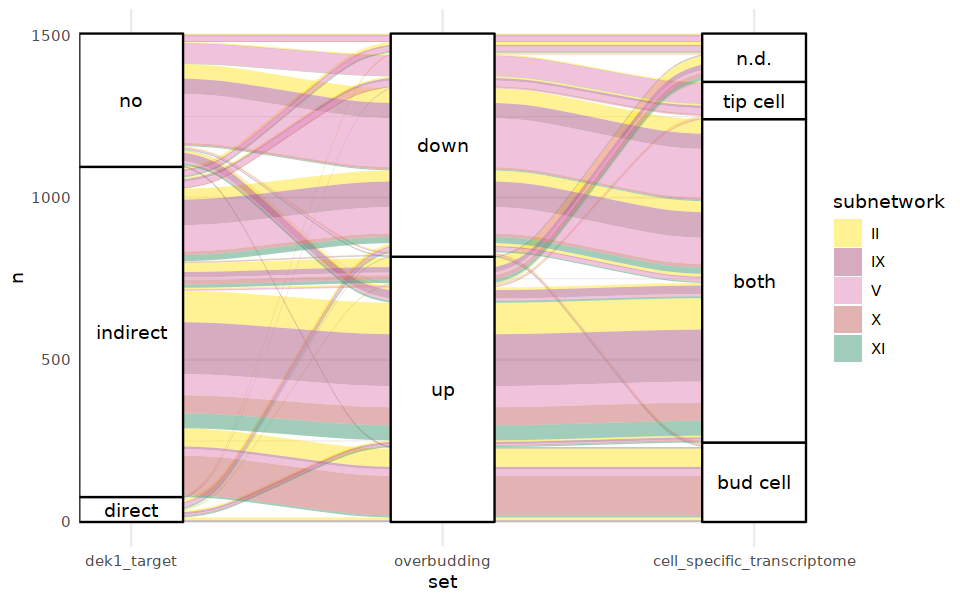

In [43]:
enriched=c("II","V","IX","X","XI")
PPa=MMA %>%
    mutate(mutant_pattern=factor(mutant_pattern,levels=c("repressor target","activator target","TF with deregulated target"))) %>%
    mutate(dek1_target=factor(ifelse(dek1_target=="both","direct",dek1_target),levels=c("no","indirect","direct"))) %>%
    filter(subnetwork %in% enriched & overbudding!= "unchanged") 
    #filter( overbudding!= "unchanged") %>%
nrow(PPa)
PPa=PPa %>%
    count(subnetwork, dek1_target,overbudding,cell_specific_transcriptome)

head(PPa)

PPP=to_lodes_form(data.frame(droplevels(PPa)),
                              key = "set",
                              axes = c(2,3,4))
head(PPP)

options(repr.plot.width=8, repr.plot.height=5)
gg=ggplot(PPP,
        aes(x=set,stratum=stratum,alluvium = alluvium,y=n,label=stratum)) +
        scale_x_discrete( expand = c(.01, .01)) +
        scale_fill_manual(values=col2)+
        geom_alluvium(aes(fill=subnetwork)) +
          geom_stratum() + geom_text(stat = "stratum") +
          theme_minimal() 
print(gg)
ggsave(gg,filename="alluvial.overbudding.vs.dek1_targets.vs.cell-specific_transcriptomes.pdf",width=8,height=5)

In [42]:
PPa

subnetwork,dek1_target,overbudding,cell_specific_transcriptome,n
<chr>,<fct>,<chr>,<fct>,<int>
II,no,down,n.d.,4
II,no,down,tip cell,4
II,no,down,both,45
II,no,down,bud cell,3
II,no,up,both,8
II,indirect,down,n.d.,9
II,indirect,down,tip cell,5
II,indirect,down,both,34
II,indirect,down,bud cell,1
